<a href="https://colab.research.google.com/github/CAVASOL/aiffel_quest/blob/main/DL_quest/DL_prep/DL_Perceptron_and_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2. Perceptron

### 2-1.  Perceptron

* 입출력을 갖춘 알고리즘 즉, 다수의 신호(흐름)를 입력으로 받아 하나의 신호를 출력
* 가중치(w, weight)와 편향(b, bias)를 매개변수로 설정
* 뉴런에서 보내온 신호의 총합이 정해진 한계(임계값, theta)를 넘어설 때만 1을 출력
* 퍼셉트론의 구조는 AND / NAND / OR 게이트의 모두에서 같음
* **단층 퍼셉트론은 직선 하나로 나눈 영역만 표현할 수 있음**
* 다층 퍼셉트론은 비선형적인 표현이 가능, `XOR Gate`

### 2-2. Logic Gate

* AND Gate / NAND Gate / OR Gate
* 두 개의 입력 신호와 하나의 출력신호.

In [ ]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [ ]:
AND(0, 0)

0

In [ ]:
AND(1, 0)

0

In [ ]:
AND(0, 1)

0

In [ ]:
AND(1, 1)

1

### 2-3. 가중치(weight)와 편향(bias)

* 퍼셉트론은 입력 신호(x)에 가중치(w)를 곱한 값과 편향(b)을 합하여, 그 값이 0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력.

In [ ]:
# 가중치(w)와 편향(b)
import numpy as np
x = np.array([0, 1])
w = np.array([0.5, 0.5])
b = -0.7 # bias
w*x

array([0. , 0.5])

In [ ]:
np.sum(w*x)

0.5

In [ ]:
np.sum(w*x) + b

-0.19999999999999996

**AND Gate**

* 입력이 모두 1이어야 출력도 1, 그 외는 0.
* 입력이 3개 이상일 수 있다. 시퀀스 회로에선 직렬을 뜻함.

In [ ]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7 # bias
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

**NAND Gate**

* 두 입력이 모두 1일 때는 0을 출력, 그 외는 1
* 전자공학에서 모든 논리 게이트를 NAND 만으로 구성 가능함. 즉, Universal Gate!

In [ ]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7 # bias
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

**OR Gate**

* 입력 신호 중 하나만 1이어도 1을 출력

In [ ]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2 # bias
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

**XOR Gate**

* 입력 신호 중 한 쪽이 1일 때만 1을 출력
* 다층 구조의 네트워크 즉, 2층 퍼셉트론(다층 퍼셉트론)
* 0층의 두 뉴런이 신호를 받아 1층 뉴런으로 신호를 보내고, 1층 뉴런이 2층 뉴런으로 신호를 보내고, 2층의 뉴런은 y를 출력

In [ ]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [ ]:
XOR(0, 0)

0

In [ ]:
XOR(1, 0)

1

In [ ]:
XOR(0, 1)

1

In [ ]:
XOR(1, 1)

0

## 3. Neural Network, NN

* 신경망에서는 활성화 함수로 비선형 함수를 사용.
* **퍼셉트론은 계단 함수**를 활성화 함수로 사용한 모델이고, **신경망은 Sigmoid 함수와 ReLU 함수**를 활성화 함수로 사용한 모델.
* 퍼셉트론에서는 뉴런 사이에 0 또는 1이 흘렀다면, 신경망에서는 연속적인 실수가 흐름.
* 계단 함수와 시그모이드 함수는 **비선형 함수**이며, 출력은 0과 1 사이에 있음.
* **ReLU 함수**는 입력(x)이 0을 넘으면 그 입력(x)을 출력하고, 0 이하이면 0을 출력함.
* 출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정함. 즉, **회귀는 Identify 함수, 2 Class 분류는 Sigmoid 함수, 다중 분류는 Softmax 함수**.

### 3-1. 퍼셉트론 복습

```
y = 0(b + w1x1 + w2x2 <= 0)
y = 1(b + w1x1 + w2x2 > 0)
```

* b는 편향을 나타내는 매개변수로 뉴런이 얼마나 쉽게 활성화 되느냐를 제어
* w는 각 신호의 가중치를 나타내는 매개변수로 각 신호의 영향력을 제어

### 3-2. 활성화 함수

```
a = b + w1x1 + w2x2
y = h(a)

h(x) = 0(x <= 0)
h(x) = 1(x > 0)
```

* `활성화 함수 activation function`는 입력 신호의 총합을 출력신호로 변환하는 함수.
* 가중치 신호를 조합한 결과가 a라는 노드가 되고, 활성화 함수 h()를 통과하여 y라는 노드로 변환.

**Step Function**

* 임계값을 경계로 출력이 변함.
* 입력이 0을 넘으면 1을 출력하고, 그 외에는 0을 출력하는 함수.

In [ ]:
import numpy as np

def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

    y = x > 0
    return y.astype(np.int)

In [ ]:
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [ ]:
y = x >0
y

array([False,  True,  True])

In [ ]:
y = y.astype(int)
y

array([0, 1, 1])

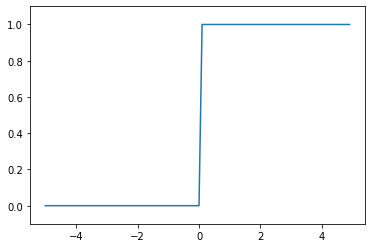

In [ ]:
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

**Sigmoid Function**

* 부드러운 곡선으로 표현되며, 입력에 따라 출력이 연손적으로 변화.

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [ ]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [ ]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

<function matplotlib.pyplot.show(close=None, block=None)>

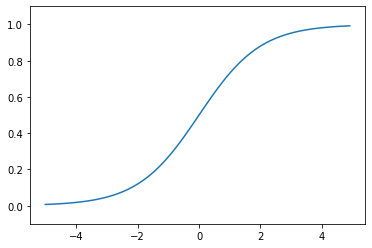

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show

**ReLU(Rectified Linear Unit) Function**

* 입력(x)이 0을 넘으면 그 입력(x)을 그대로 출력하고, 0 이하이면 0을 출력.
* maximun()은 두 입력 중 큰 값을 선택해 반환.

In [ ]:
def relu(x):
    return np.maximum(0, x)

<function matplotlib.pyplot.show(close=None, block=None)>

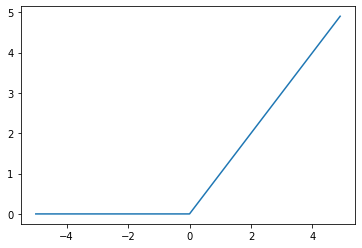

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.show

### 3-3. 다차원 배열의 계산

* np.ndim() 배열의 차원 수를 확인.
* shape 배열의 형상 확인

In [ ]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [ ]:
np.ndim(B) # 2차원 행렬(matrix)

2

In [ ]:
B.shape # 3x2 행렬. 즉, 3행 2열인 행렬(matrix)

(3, 2)

### 3-4. 행렬의 내적과 연산

* 행렬의 형상(Shape) 즉, 차원의 원소 수가 같아야 연산이 가능함.
* 행렬 A(`3`x2)와 행렬 B(2x`4`)의 연산 결과인 C행렬(`3x4`)의 형상은 A행렬의 행 수와 B행렬의 열 수가 됨.
* 피연산자의 순서가 다르면 결과도 다름. 즉, A x B != B x A

In [ ]:
A = np.array([[1, 2, 3], [4, 5, 6]])
A.shape

(2, 3)

In [ ]:
B = np.array([[1, 2], [3, 4], [5, 6]])
B.shape

(3, 2)

In [ ]:
Y = np.dot(A, B)
print(Y)

[[22 28]
 [49 64]]


### 3-5. 3층 신경망의 신호 전달 과정

* 0층: 입력 신호(x) > 1층: 은닉층(a1) > 2층: 은닉층(a2) > 3층: 출력 신호(y)
* A = XW + B

In [ ]:
# 입력 신호(X), 가중치(W), 편향(B) 설정하기
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(X.shape)
print(W1.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

(2,)
(2, 3)
(3,)


In [ ]:
# 입력층에서 1층(은닉1)으로 신호 전달
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [ ]:
# 1층(은닉1)에서 2층(은닉2)으로 신호 전달

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [ ]:
# 2층(은닉2)에서 3층(출력 신호)으로 신호 전달

def identify_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identify_function(A3)

### 3-6. 출력층 설계하기

* 출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정함.
* 회귀는 Identify 함수, 2 Class 분류는 Sigmoid 함수, 다중 분류는 Softmax 함수.

**항등 함수를 활용한 신경망의 순방향 신호 전달 과정**

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x):
    return x

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


**Softmax Function**

* 모든 신호로부터 받은 값을 연산하여 출력하고, 출력은 0과 1사이의 실수.
* 출력의 총합은 1이며, 함수의 출력값을 확률로 해석할 수 있음.

In [ ]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [ ]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [ ]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [ ]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

**Overflow**

>`Softmax 함수`는 `지수 함수 exp(x)`를  사용하는데, 지수 함수는 쉽게 아주 큰 값을 연산할 수 있습니다.  
즉, 무한대의 값을 연산하는 루프가 될 수 있어요.  그렇기에 나눗셈을 지속할수록 수치가 불안정해집니다. 이러한 오류를 `오버플로` 라고 합니다.  
오버플로를 해결하기 위해서는 지수 함수에 입력 신호 중 최대값인 임의의 정수(C')를 연산에 더하거나 빼는 방법을 사용할 수 있습니다!

In [ ]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

/tmp/ipykernel_30/832863605.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
/tmp/ipykernel_30/832863605.py:2: RuntimeWarning: invalid value encountered in true_divide
  np.exp(a) / np.sum(np.exp(a))


array([nan, nan, nan])

In [ ]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [ ]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

**소프트맥스 함수를 활용한 신경망의 신호 전달 과정**

In [ ]:
def softmax(a):
    # c = np.max(a - c)
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [ ]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [ ]:
np.sum(y)

1.0

### 3-7. 손글씨 숫자 인식

* 신경망의 순전파 forward propagation
* 정규화 nomalization: 데이터를 특정 범위로 변환하는 처리
* 전처리 pre-processing: 신경망의 입력 데이터에 특정 변환을 가하는 것

In [ ]:
# Lib
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from PIL import Image
import numpy as np

# Dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

img = X_train[0]
label = y_train[0]
print(label)

print(img.shape)
img_show(img)

5
(28, 28)


In [ ]:
# 신경망의 추론 처리를 위해 세 함수인 get_data(), init_network(), predict() 정의하기

import pickle

def get_data():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    return X_test, y_test

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x):
    return x

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    x = x.reshape(-1, 784)

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

In [ ]:
# 신경망에 의한 추론을 수행한 후, 정확도 평가

X, y = get_data()
network = init_network()
accuracy_cnt = 0

for i in range(len(X)):
    y_pred = predict(network, X[i])
    p = np.argmax(y_pred)
    if p == y[i]:
        accuracy_cnt += 1

accuracy = float(accuracy_cnt) / len(X)
print("Accuracy: " + str(accuracy))

/tmp/ipykernel_31/46671533.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Accuracy: 0.9207


**배치 처리**

* `배치 Batch` 하나로 묶은 입력 데이터를 의미합니다.
* 수치 계산 라이브러리 대부분이 큰 배열을 효율적으로 처리할 수 있도록 고도로 최적화.
* 커다란 신경망에서는 데이터 전송이 병목으로 작용하는 경우가 자주 있는데, 빠른 CPU나 GPU로 순수 계산을 수행하는 비율이 높아짐.

In [ ]:
# 신경망 각 층의 가중치 형상 출력

X, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

X.shape

(10000, 28, 28)

In [ ]:
X[0].shape

(28, 28)

In [ ]:
W1.shape

(784, 50)

In [ ]:
W2.shape

(50, 100)

In [ ]:
W3.shape

(100, 10)

In [ ]:
# 배치 처리 구현

X, y = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(X), batch_size):
    x_batch = X[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == y[i:i+batch_size])

accuracy = float(accuracy_cnt) / len(X)
print("Accuracy: " + str(accuracy))

Accuracy: 0.9207


/tmp/ipykernel_31/46671533.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
